In [3]:
nb_bench = 3
col_name = ["func", "start", "end", "filename", "worker", "thread", "process"]

In [12]:
from math import sqrt
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def plot_results(exp_type, exp_names, xlabel, xticks_label, *, f_out=None):
    # Path to result file
    spark_file_np = "../{0}/data/results-spark_{0}-{2}-{1}.csv"
    dask_bag_file_np = "../{0}/data/results-dask-bag_{0}-{2}-{1}.csv"
    dask_delayed_file_np = "../{0}/data/results-dask-delayed_{0}-{2}-{1}.csv"
    spark_file = "../{0}/old-data/data-{1}/results-spark_{0}-{2}.csv"
    dask_bag_file = "../{0}/old-data/data-{1}/results-dask-bag_{0}-{2}.csv"
    dask_delayed_file = "../{0}/old-data/data-{1}/results-dask-delayed_{0}-{2}.csv"

    # Retrieve file name
    spark_np = [
        [
            pd.read_csv(
                spark_file_np.format(exp_type, nth_bench, exp_name), names=col_name
            ).end.max()
            for nth_bench in range(1, nb_bench + 1)
            if os.path.exists(spark_file_np.format(exp_type, nth_bench, exp_name))
        ]
        for exp_name in exp_names
    ]

    dask_bag_np = [
        [
            pd.read_csv(
                dask_bag_file_np.format(exp_type, nth_bench, exp_name), names=col_name
            ).end.max()
            for nth_bench in range(1, nb_bench + 1)
            if os.path.exists(dask_bag_file_np.format(exp_type, nth_bench, exp_name))
        ]
        for exp_name in exp_names
    ]
    
    dask_delayed_np = [
        [
            pd.read_csv(
                dask_delayed_file_np.format(exp_type, nth_bench, exp_name), names=col_name
            ).end.max()
            for nth_bench in range(1, nb_bench + 1)
            if os.path.exists(dask_delayed_file_np.format(exp_type, nth_bench, exp_name))
        ]
        for exp_name in exp_names
    ]
    
    spark = [
        [
            pd.read_csv(
                spark_file.format(exp_type, nth_bench, exp_name), names=col_name
            ).end.max()
            for nth_bench in range(1, nb_bench + 1)
            if os.path.exists(spark_file.format(exp_type, nth_bench, exp_name))
        ]
        for exp_name in exp_names
    ]

    dask_bag = [
        [
            pd.read_csv(
                dask_bag_file.format(exp_type, nth_bench, exp_name), names=col_name
            ).end.max()
            for nth_bench in range(1, nb_bench + 1)
            if os.path.exists(dask_bag_file.format(exp_type, nth_bench, exp_name))
        ]
        for exp_name in exp_names
    ]
    
    dask_delayed = [
        [
            pd.read_csv(
                dask_delayed_file.format(exp_type, nth_bench, exp_name), names=col_name
            ).end.max()
            for nth_bench in range(1, nb_bench + 1)
            if os.path.exists(dask_delayed_file.format(exp_type, nth_bench, exp_name))
        ]
        for exp_name in exp_names
    ]

    # Calculate statistics
    spark_np_stat = {
        "mean": list(map(np.mean, spark_np)),
        "std": list(map(np.std, spark_np))
    }
    dask_bag_np_stat = {
        "mean": list(map(np.mean, dask_bag_np)),
        "std": list(map(np.std, dask_bag_np)),
    }
    dask_delayed_np_stat = {
        "mean": list(map(np.mean, dask_delayed_np)),
        "std": list(map(np.std, dask_delayed_np)),
    }
    spark_stat = {
        "mean": list(map(np.mean, spark)),
        "std": list(map(np.std, spark))
    }
    dask_bag_stat = {
        "mean": list(map(np.mean, dask_bag)),
        "std": list(map(np.std, dask_bag)),
    }
    dask_delayed_stat = {
        "mean": list(map(np.mean, dask_delayed)),
        "std": list(map(np.std, dask_delayed)),
    }

    # Generate plot
    fig, ax = plt.subplots(figsize=(10, 5))

    barWidth = 0.15

    # Set position of bar on X axis
    r1 = np.arange(len(spark_np))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    r4 = [x + barWidth for x in r3]
    r5 = [x + barWidth for x in r4]
    r6 = [x + barWidth for x in r5]

    plt.bar(
        r1,
        spark_np_stat["mean"],
        yerr=spark_np_stat["std"],
        color="blue",
        width=barWidth,
        edgecolor="black",
        alpha=0.66,
        label="Spark - NumPy",
    )
    plt.bar(
        r2,
        dask_bag_np_stat["mean"],
        yerr=dask_bag_np_stat["std"],
        color="crimson",
        width=barWidth,
        edgecolor="black",
        alpha=0.66,
        label="Dask Bag - NumPy",
    )
    plt.bar(
        r3,
        dask_delayed_np_stat["mean"],
        yerr=dask_delayed_np_stat["std"],
        color="orange",
        width=barWidth,
        edgecolor="black",
        alpha=0.66,
        label="Dask Delayed - NumPy",
    )
    
    plt.bar(
        r4,
        spark_stat["mean"],
        yerr=spark_stat["std"],
        color="deepskyblue",
        width=barWidth,
        edgecolor="black",
        alpha=0.66,
        label="Spark",
    )
    plt.bar(
        r5,
        dask_bag_stat["mean"],
        yerr=dask_bag_stat["std"],
        color="orangered",
        width=barWidth,
        edgecolor="black",
        alpha=0.66,
        label="Dask Bag",
    )
    plt.bar(
        r6,
        dask_delayed_stat["mean"],
        yerr=dask_delayed_stat["std"],
        color="gold",
        width=barWidth,
        edgecolor="black",
        alpha=0.66,
        label="Dask Delayed",
    )

    # Add xticks on the middle of the group bars
    plt.xlabel(xlabel, fontweight="bold")
    plt.xticks([r + barWidth/2 for r in r3], xticks_label)
    plt.ylabel("Makespan")
    plt.ylim([0,11000])

    plt.legend(loc="upper right", bbox_to_anchor=(1.285, 1.02))
    
    if f_out:
        plt.savefig("./figures/"+f_out, bbox_inches='tight')
        
    plt.show()

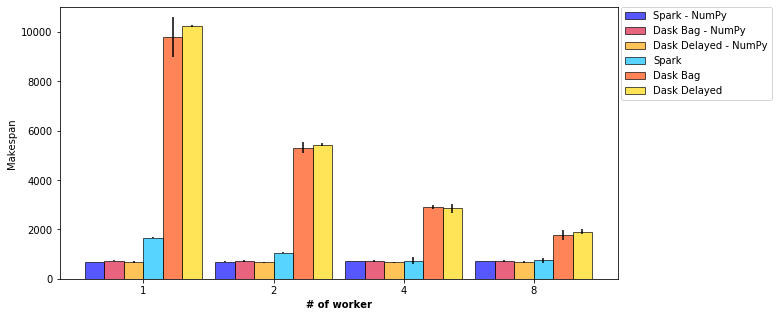

In [13]:
exp_type = "histogram"
exp_names = ["1node", "2node", "4node", "baseline"]
xlabel = "# of worker"
xticks_label = ["1", "2", "4", "8"]
f_out = "histo_worker.png"

plot_results(exp_type, exp_names, xlabel, xticks_label, f_out=f_out)

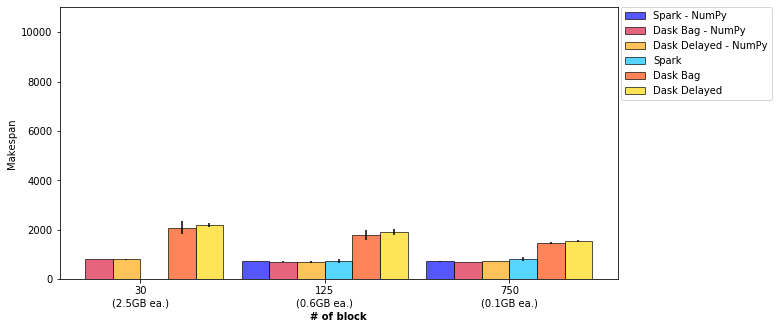

In [14]:
exp_type = "histogram"
exp_names = ["30chunks", "baseline", "750chunks"]
xlabel = "# of block"
xticks_label = ["30\n(2.5GB ea.)", "125\n(0.6GB ea.)", "750\n(0.1GB ea.)"]
f_out = "histo_block.png"

plot_results(exp_type, exp_names, xlabel, xticks_label, f_out=f_out)